1) The first step in the process, is to select the data.  In this case, there is just one data source (movie reviews).  These are presented to the UI by asking CloudSearch to tell us the available domains.  In this case, it is just rocket (movie reviews)


In [ ]:
import json
import boto3
cs_client = boto3.client('cloudsearch',)
cs_client.list_domain_names()['DomainNames']

In [ ]:
 # list data sources
cloudsearch_client = boto3.client('cloudsearchdomain',endpoint_url='https://search-rocket-v3wsrkhqhk3ls5u32q2s7jsldq.us-east-1.cloudsearch.amazonaws.com')
cloudsearch_client.search(
    #cursor='string',
    #expr='string',
    #facet='string',
    #filterQuery='string',
    #highlight='string',
    #partial=True|False,
    query='James Bond',
    #queryOptions='string',
    #queryParser='simple'|'structured'|'lucene'|'dismax',
    #returnFields='string',
    size=10,
    #sort='string',
    #start=123,
    #stats='string'
)

2) Next, we generate concepts.  The following code blocks show the application's CRUD operations for Concepts on AWS.  For movies, we are considering sentiment. Positive (1) and negative (0).

Services in RoCKET are available via an API that interacts with S3, DynamoDB, CloudSearch, and an EKS compute cluster.  All functionality is has controlled access through the AWS API Gateway services, depending on the user's role.

In [ ]:
# hit the services directly (ping test)
import requests

# test get concept
headers = {
    'cache-control': 'no-cache',
    'x-api-key': 'LOw5yIHqzf9c5layPN0SNaNXgTOWzH8I5z7y5V6f',
    'Host': 'nz33f5gf45.execute-api.us-east-1.amazonaws.com'
}

path = r'https://vpce-02c9693a7afa5a3d4-d490t8kz.execute-api.us-east-1.vpce.amazonaws.com/dev/'

r = requests.get(path+'ping', headers=headers)
r.json()


In [ ]:
# get the concepts
r = requests.get(path+'getConcepts', headers=headers)
r.json()

In [ ]:
# create sentiment concept
parameters = {
    'concept_name':'positive sentiment',
    'keywords':'great, fantastic'
}
r = requests.get(path+'createConcept', params=parameters, headers=headers)
r.json()

In [ ]:
# update sentiment concept
parameters = {
    'concept_name':'positive sentiment',
    'keywords':'great,fantastic,super,10 of 10'
}
r = requests.get(path+'updateConcept', params=parameters, headers=headers)
r.json()

In [ ]:
# test delete concept
parameters = {
    'concept_name':'RoCKET'
}
r = requests.get(path+'deleteConcept', params=parameters, headers=headers)
r.json()

3) With the sentiment concept defined, we then enrich it using related words.


In [ ]:
pos_df.columns

In [30]:
print(len(pos_df))
print(len(neg_df))

31852
23525


In [31]:
!python engineer_data.py

In [2]:

import pickle


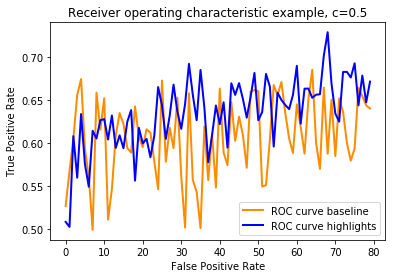

In [28]:
# Compute ROC curve and ROC area for each class
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(norm_auc,color='darkorange',lw=lw, label='ROC curve baseline')
plt.plot(high_auc,color='blue',lw=lw, label='ROC curve highlights')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('Step by step')
plt.ylabel('AOC')
plt.title('Receiver operating characteristic, c=0.5')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(type(reg_predictions))

In [ ]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [ ]:
# just the response
from tensorboardX import SummaryWriter
# Reference/Credit Stats class & reporting mechanisms: danielnbarbosa/drlnd_collaboration_and_competition 


In [ ]:
# list containing scores from each episode
stats = Stats()
stats_format = 'Buffer: {:6}   NoiseW: {:.4}'

keep_going = True:
while keep_going:
    # label pos/neg 
    
    # train logistic regression model
    
    # score using next closest
    
    # print results
#     stats.update(t, [np.max(per_agent_rewards)], i_episode)  # use max over all agents as episode reward
#     stats.print_episode(i_episode, t, stats_format, buffer_len, self.agent.noise_weight,
#                         self.agent.agents[0].critic_loss, self.agent.agents[1].critic_loss,
#                         self.agent.agents[0].actor_loss, self.agent.agents[1].actor_loss,
#                         self.agent.agents[0].noise_val, self.agent.agents[1].noise_val,
#                         per_agent_rewards[0], per_agent_rewards[1])
    
    # check if done
class Stats():
    def __init__(self):
        self.baseline_auc = []                  # list containing auc for each cycle
        self.highlight_auc = []                 # list containing auc for each cycle
        self.time_start = time.time()            # track cumulative wall time
        self.total_steps = 0                     # track cumulative steps taken
        self.writer = SummaryWriter()

    def update(self, baseline_auc, highlight_auc, i_episode):
        """Update stats after each episode."""
        self.total_steps += steps
        
        self.baseline_auc.append(baseline_auc)
        self.highlight_auc.append(highlight_auc)

    def is_solved(self, i_episode):
        """Define stopping criteria."""
        return False

    def print_episode(self, i_episode, baseline_auc,
                      highlight_auc):
        common_stats = 'Episode: {:5}   Base AUC: {:8.3f}   Highlighting AUC: {:8.3f}  |  '.format(i_episode, self.baseline_auc, self.highlight_auc)
        print('\r' + common_stats )
        # log to tensorboard
        self.writer.add_scalar('baseline/auc', baseline_auc, i_episode)
        self.writer.add_scalar('highlight/auc', highlight_auc, i_episode)

    def print_epoch(self, i_episode, stats_format, *args):
        n_secs = int(time.time() - self.time_start)
        common_stats = 'Episode: {:5}   Secs: {:6}      |  '.format(i_episode, n_secs)
        print('\r' + common_stats + stats_format.format(*args))

    def print_solve(self, i_episode, stats_format, *args):
        self.print_epoch(i_episode, stats_format, *args)
        print('\nSolved in {:d} episodes!'.format(i_episode-100))

        # list containing scores from each episode
        stats = Stats()
        stats_format = 'Every: {:6}   C: {:.4}'

        for i_episode in range(1, n_episodes+1):
           # loop over steps
            for t in range(max_timesteps):
                # select an action
                if self.agent.evaluation_only:  # disable noise on evaluation
                    action = self.agent.act(state, add_noise=False)
                else:
                    action = self.agent.act(state)

            stats.update(t, [np.max(per_agent_rewards)], i_episode)  # use max over all agents as episode reward
            stats.print_episode(i_episode, t, stats_format, buffer_len, self.agent.noise_weight,
                                self.agent.agents[0].critic_loss, self.agent.agents[1].critic_loss,
                                self.agent.agents[0].actor_loss, self.agent.agents[1].actor_loss,
                                self.agent.agents[0].noise_val, self.agent.agents[1].noise_val,
                                per_agent_rewards[0], per_agent_rewards[1])

            # every epoch (100 episodes)
            if i_episode % 100 == 0:
               #stats.print_epoch(i_episode, stats_format, buffer_len, agent.noise_weight)
               save_name = 'saves/episode.{}.'.format(i_episode)
               for i, save_agent in enumerate(self.agent.agents):
                   torch.save(save_agent.actor_local.state_dict(), save_name + str(i) + '.actor.pth')
                   torch.save(save_agent.critic_local.state_dict(), save_name + str(i) + '.critic.pth')

            # if solved
            if stats.is_solved(i_episode, min_solve_threshold):
                stats.print_solve(i_episode, stats_format, buffer_len, self.agent.noise_weight)
                save_name = 'saves/solved.'
                for i, save_agent in enumerate(self.agent.agents):
                    torch.save(save_agent.actor_local.state_dict(), save_name + str(i) + '.actor.pth')
                    torch.save(save_agent.critic_local.state_dict(), save_name + str(i) + '.critic.pth')
                break
        

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(predictions)
plt.title('prediction plots')
plt.show()